In [81]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = '/home/batman/Desktop/py/cybersecurity-jina/data/small_result230.csv'
df = read_csv(path)
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [82]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [83]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
15096,80,6,1.519356e+09,46,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15097,80,6,1.519383e+09,277,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15098,80,6,1.519381e+09,331,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15099,80,6,1.519355e+09,313,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15100,80,6,1.519383e+09,190,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [84]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [85]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [121]:
# define the  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

Epoch 1/50
633/633 - 4s - loss: 843438.1875 - accuracy: 0.9420 - val_loss: 820550.1875 - val_accuracy: 0.3371 - 4s/epoch - 6ms/step
Epoch 2/50
633/633 - 2s - loss: 687127.3750 - accuracy: 0.9500 - val_loss: 515397.6562 - val_accuracy: 0.9703 - 2s/epoch - 4ms/step
Epoch 3/50
633/633 - 2s - loss: 717292.1875 - accuracy: 0.9509 - val_loss: 1474018.8750 - val_accuracy: 0.9617 - 2s/epoch - 4ms/step
Epoch 4/50
633/633 - 2s - loss: 667976.1250 - accuracy: 0.9518 - val_loss: 476724.5938 - val_accuracy: 0.9771 - 2s/epoch - 4ms/step
Epoch 5/50
633/633 - 2s - loss: 592130.6875 - accuracy: 0.9541 - val_loss: 514613.4688 - val_accuracy: 0.9781 - 2s/epoch - 3ms/step
Epoch 6/50
633/633 - 2s - loss: 676220.5000 - accuracy: 0.9530 - val_loss: 408504.6562 - val_accuracy: 0.9747 - 2s/epoch - 3ms/step
Epoch 7/50
633/633 - 2s - loss: 674466.9375 - accuracy: 0.9554 - val_loss: 227256.2656 - val_accuracy: 0.7871 - 2s/epoch - 3ms/step
Epoch 8/50
633/633 - 3s - loss: 593266.5000 - accuracy: 0.9580 - val_loss: 

  1/156 [..............................] - ETA: 13s

156/156 [==============================] - 0s 2ms/step


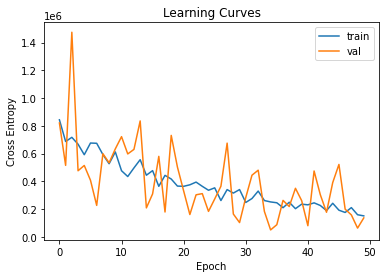

In [122]:
# predict test set
yhat = model.predict(X_test)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [123]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.975321
Precision: 0.757576
Recall: 0.523560
F1 score: 0.619195


In [124]:
# Calculate per class accuracy
cmd = confusion_matrix(y_test, yhat, normalize="true").diagonal()
per_class_accuracy_df = pd.DataFrame([(index, round(value,4)) for index, value in zip(['Benign', 'Attack'], cmd)], columns = ['type', 'accuracy'])
per_class_accuracy_df = per_class_accuracy_df.round(2)
print(per_class_accuracy_df)

     type  accuracy
0  Benign      0.99
1  Attack      0.52


In [90]:
X_test.shape

(4984, 79)

In [91]:
X_test[0].shape

(79,)

In [92]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 47ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [93]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### Perform network surgery

In [94]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [95]:
model.summary() # before

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               10240     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [97]:
model = Model(inputs=model.input, outputs=model.get_layer("dense_6").output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6_input (InputLayer)  [(None, 79)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               10240     
                                                                 
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
_________________________________________________________________


In [98]:
preds = model.predict(X_test[:100])
preds.shape

4/4 [==============================] - 0s 4ms/step


(100, 128)

# vectors are 128-D now (as opposed to 79 from before)

In [99]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [100]:
X_test[0].shape # old shape

(79,)

In [101]:
preds[0].shape # new shape

(128,)

### Now we are going to take our embeddings data, and add some of the "pre-encoded" features.

### The idea here is just to add the "raw" features so the user has an idea, for example, when they see a malicious classifications what the original data looked like.

In [102]:
import pandas as pd


df = pd.read_csv("/home/batman/Desktop/py/cybersecurity-jina/data/small_result230.csv")
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [103]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [104]:
X_only = df.iloc[:, :-1].astype("float32")
y_only = df.iloc[:, -1].astype("float32")
y_only

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15096    1.0
15097    1.0
15098    1.0
15099    1.0
15100    1.0
Name: Label, Length: 15101, dtype: float32

In [105]:
res = model.predict(X_only)
res.shape

  1/472 [..............................] - ETA: 20s

472/472 [==============================] - 1s 3ms/step


(15101, 128)

In [106]:
# add label column to embeddings
embeddings_df = pd.DataFrame(res)
embeddings_df["Label"] = y_only
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.0,156095248.0,226564912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,156776912.0,227304976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,135603152.0,207210624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2188315.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,155756544.0,226959520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,155468048.0,227276016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# embeddings_df.to_csv("embeddings_df.csv", index=0)

In [108]:
# add "raw" features for each embedding so we can show them in streamlit later
result = pd.concat([embeddings_df, df], axis=1)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,156095248.0,226564912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,0.0,156776912.0,227304976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [109]:
# shuffle results so that the malicious attacks aren't all at the bottom
result = result.sample(frac=1, random_state=0)
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
10799,0.0,156293472.0,226322656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
2732,0.0,180723488.0,213759296.0,65262752.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,86239131.0,0.0,86239131,86239131,0


In [110]:
# add random date/times
import random
import time
from datetime import datetime
dates = []
def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

for i in range(0 , len(result)):
    dates.append(randomDate("20-01-2018 13:30:00", "23-01-2018 04:50:34"))
dates

[datetime.datetime(2018, 1, 22, 7, 29, 16),
 datetime.datetime(2018, 1, 21, 5, 11, 40),
 datetime.datetime(2018, 1, 20, 21, 53, 39),
 datetime.datetime(2018, 1, 23, 3, 11, 9),
 datetime.datetime(2018, 1, 22, 7, 24, 24),
 datetime.datetime(2018, 1, 22, 15, 12, 52),
 datetime.datetime(2018, 1, 20, 17, 29, 45),
 datetime.datetime(2018, 1, 21, 17, 8, 53),
 datetime.datetime(2018, 1, 22, 15, 39, 18),
 datetime.datetime(2018, 1, 20, 16, 41, 28),
 datetime.datetime(2018, 1, 21, 16, 12, 50),
 datetime.datetime(2018, 1, 21, 5, 2),
 datetime.datetime(2018, 1, 22, 10, 13, 58),
 datetime.datetime(2018, 1, 21, 8, 9, 9),
 datetime.datetime(2018, 1, 20, 17, 58, 26),
 datetime.datetime(2018, 1, 20, 19, 35, 35),
 datetime.datetime(2018, 1, 21, 0, 3, 15),
 datetime.datetime(2018, 1, 21, 14, 42, 43),
 datetime.datetime(2018, 1, 21, 7, 6, 35),
 datetime.datetime(2018, 1, 21, 1, 34, 7),
 datetime.datetime(2018, 1, 21, 21, 3, 1),
 datetime.datetime(2018, 1, 21, 13, 25, 52),
 datetime.datetime(2018, 1, 23, 3

In [111]:
result.insert(loc=len(result.columns)-1, column='dt', value=dates)
result.head(2)


,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
13002,0.0,156042144.0,226624464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-22 07:29:16,0
8137,0.0,180735776.0,213722432.0,65059464.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86075433.0,0.0,86075433,86075433,2018-01-21 05:11:40,0


In [112]:
result.sort_values(by="dt", inplace=True)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
5972,0.0,156417712.0,226401920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:28,0
12388,0.0,156050208.0,226605424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:28,0


In [113]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
12,0.0,156192992.0,226450944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:23,0
14916,0.0,156305824.0,226329200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:26,1


In [114]:
result.iloc[:, :128].head(2)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
5972,0.0,156417712.0,226401920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12388,0.0,156050208.0,226605424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
5972,0.0,156417712.0,226401920.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:28,0
12388,0.0,156050208.0,226605424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:28,0


In [116]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
12,0.0,156192992.0,226450944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:23,0
14916,0.0,156305824.0,226329200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:26,1


In [117]:
# result.to_csv("embeddings_df_with_details.csv", index=0)

## in app

In [118]:
from jina import Document, DocumentArray

In [119]:
da = DocumentArray.load("/home/batman/Desktop/py/cybersecurity-jina/results/index")
da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 15101                         │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│   Multimodal dataclass   False                         │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   15101            False             │
│   id          ('str',)       15101            False             │
│   tags        ('dict',)      15101            False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [120]:
da_df = da.to_dataframe()
da_df.head(2)

,id,parent_id,granularity,adjacency,blob,tensor,mime_type,text,weight,uri,tags,offset,location,embedding,modality,evaluations,scores,chunks,matches
0,85a400f355ea2f200aebec5ef8a36131,None,None,None,None,None,None,None,None,None,"{'protocol': 6.0, 'dt': '2018-01-20 13:30:11',...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
1,5a8f1be87b149f3f9827fa079eac339a,None,None,None,None,None,None,None,None,None,"{'dt': '2018-01-20 13:30:18', 'port': 41008.0,...",None,None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None,None
